# import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [3]:
#!pip install yellowbrick

In [4]:
#reading data
data=pd.read_csv('/Users/Jerry/Desktop/CSC373/jupyter notebook/Credit Card Customer Data.csv')
print(f'Shape of data: {data.shape[0]} rows and {data.shape[1]} columns')
data.head()

Shape of data: 660 rows and 7 columns


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


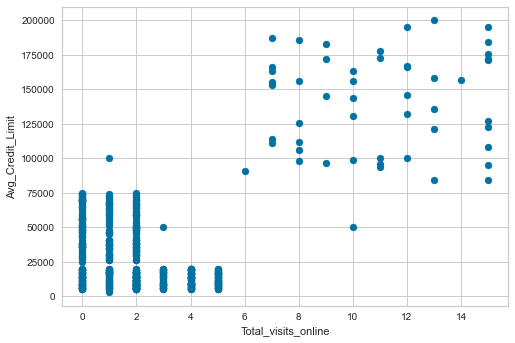

In [5]:
plt.scatter(data['Total_visits_online'],data['Avg_Credit_Limit'])
plt.xlabel('Total_visits_online')
plt.ylabel('Avg_Credit_Limit')
plt.show()

In [6]:
x=data[['Total_visits_online','Avg_Credit_Limit']]
x.head()

,Total_visits_online,Avg_Credit_Limit
0,1,100000
1,10,50000
2,3,50000
3,1,30000
4,12,100000


In [7]:
kmeans = KMeans(2)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

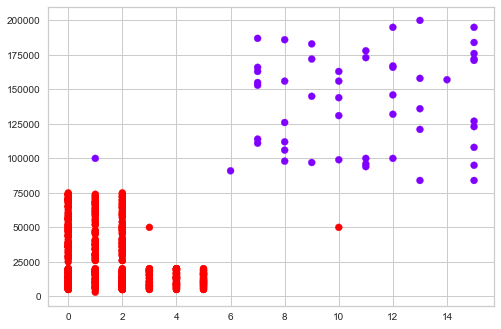

In [8]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Total_visits_online'],data_with_clusters['Avg_Credit_Limit'],c=data_with_clusters['Clusters'],cmap='rainbow')

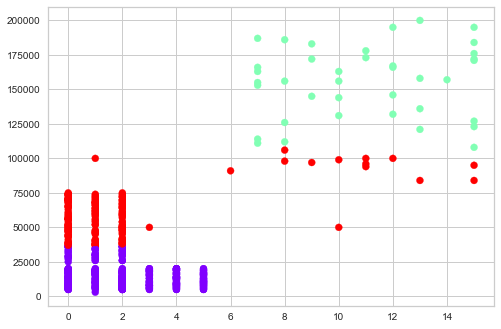

In [9]:
kmeans = KMeans(3)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Total_visits_online'],data_with_clusters['Avg_Credit_Limit'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [10]:
# reference: https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

In [11]:
df = data.drop(columns = ['Sl_No', 'Customer Key'])
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


Elbow Method to determine the number of clusters to be formed:


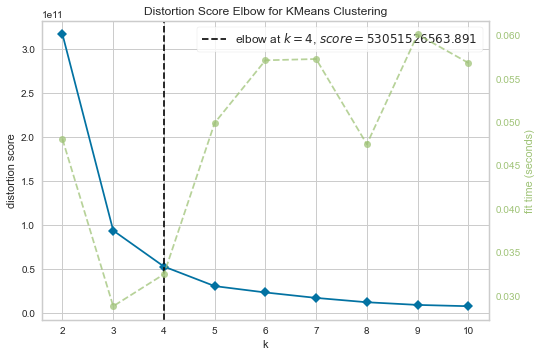

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

## According to the Elbow method, I believe K=4 is the most appropriate number of cluster

In [13]:
kmeans = KMeans(4)
kmeans.fit(df)
identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([1, 3, 3, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##  The dataset's dimension is still high, and it is not good for our visualization. Having a 2d or 3d dimensional dataset is easy to visualize the clustering result 

# PCA

In [14]:
dfs=df.copy()
scaler = StandardScaler()
scaler.fit(dfs)
scaled_dfs = pd.DataFrame(scaler.transform(dfs),columns= dfs.columns )
print("All features are now scaled")

All features are now scaled


In [15]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=2)
pca.fit(scaled_dfs)
PCA_dfs = pd.DataFrame(pca.transform(scaled_dfs), columns=(["col1","col2"]))
PCA_dfs.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,660.0,3.014424e-16,1.513373,-3.057625,-1.397382,0.295800,0.960611,4.294100
col2,660.0,2.058959e-16,1.369001,-2.099758,-0.978412,-0.268071,0.765307,5.161498


In [16]:
PCA_dfs.head()

,col1,col2
0,0.501291,0.524829
1,-1.459560,3.105588
2,0.525795,0.823979
3,-0.362294,0.128123
4,1.266228,3.668708


In [17]:
kmeans = KMeans(3)
kmeans.fit(PCA_dfs)
identified_clusters = kmeans.fit_predict(PCA_dfs)
identified_clusters

array([1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

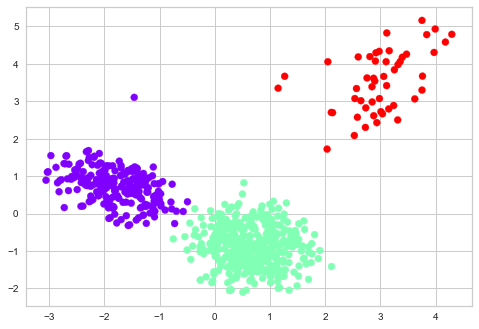

In [18]:
data_with_clusters = PCA_dfs.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['col1'],data_with_clusters['col2'],c=data_with_clusters['Clusters'],cmap='rainbow')

# hierarchical clustering 

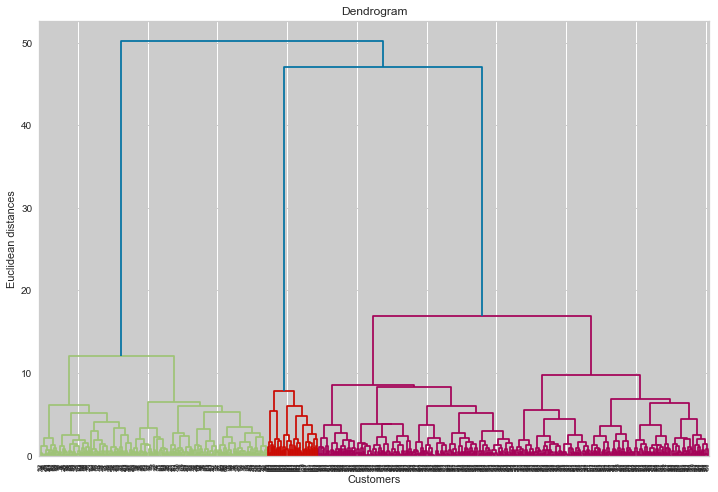

In [19]:
import scipy.cluster.hierarchy as sch #import the library
plt.figure(figsize=(12,8)) #Canvas size
dendrogram = sch.dendrogram(sch.linkage(scaled_dfs, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## The Dendrogram also shows that setting K=3 is appropriate

# DBSCAN

In [34]:
PCA_dfs.head()

,col1,col2,DBSCAN_labels,DBSCAN_opt_labels
0,0.501291,0.524829,0,1
1,-1.459560,3.105588,-1,-1
2,0.525795,0.823979,0,-1
3,-0.362294,0.128123,0,1
4,1.266228,3.668708,-1,-1


In [35]:
df = PCA_dfs
dbscan=DBSCAN()
dbscan.fit(df[['col1','col2']])

DBSCAN()

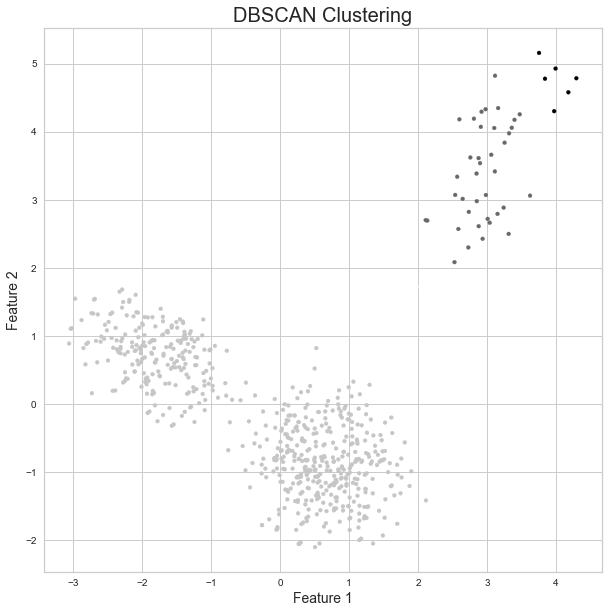

In [37]:
df['DBSCAN_labels']=dbscan.labels_ 

import matplotlib
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df['col1'],df['col2'],c=df['DBSCAN_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [27]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[['col1','col2']])
distances, indices = nbrs.kneighbors(df[['col1','col2']])

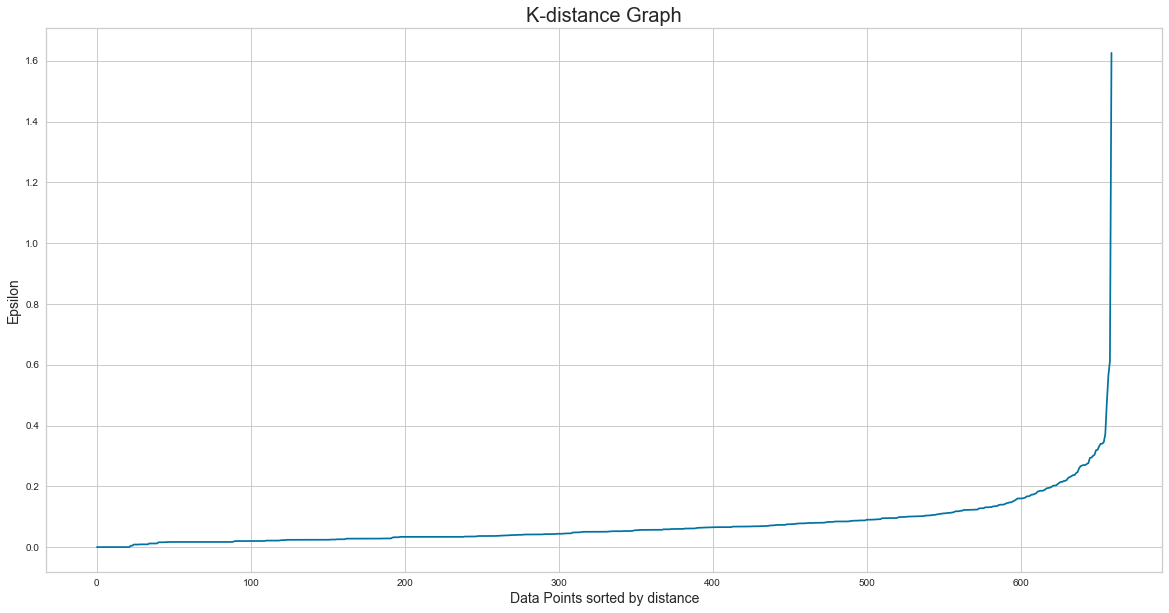

In [28]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [29]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.3,min_samples=6)
dbscan_opt.fit(df[['col1','col2']])

DBSCAN(eps=0.3, min_samples=6)

In [30]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 1    384
 0    221
-1     30
 2     10
 3      8
 4      7
Name: DBSCAN_opt_labels, dtype: int64

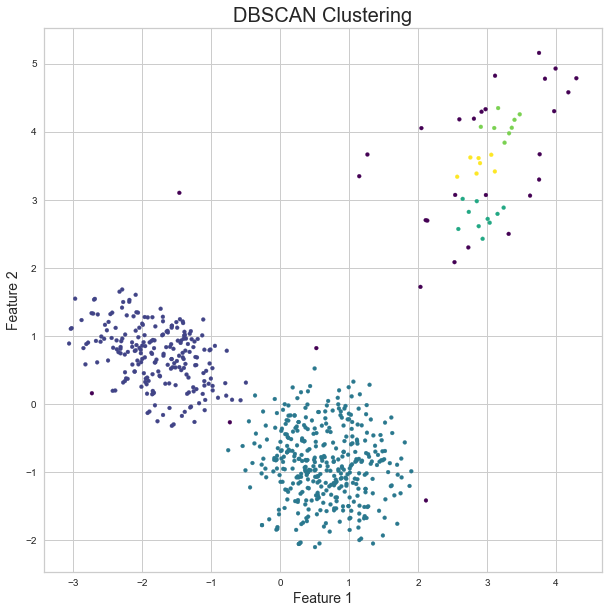

In [32]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df['col1'],df['col2'],c=df['DBSCAN_opt_labels'],cmap='viridis',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()